<a href="https://colab.research.google.com/github/Pavankumar2124/Class/blob/main/22BCE2124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline



In [2]:
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/shootings.csv"
data = pd.read_csv(url)

In [3]:
print("🔹 First 5 Rows of the Dataset:")
display(data.head())

🔹 First 5 Rows of the Dataset:


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,FALSE,Guns
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,FALSE,Guns
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,FALSE,Unarmed
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,FALSE,Other unusual objects
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,FALSE,Piercing objects


In [4]:
print("\nDataset Shape:", data.shape)


Dataset Shape: (4895, 15)


In [5]:
print("\n Missing Values in Each Column:")
print(data.isnull().sum())



 Missing Values in Each Column:
id                         0
name                       0
date                       0
manner_of_death            3
armed                      0
age                        0
gender                     0
race                       2
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              2
dtype: int64


In [6]:
print(" Summary Statistics:")
display(data.describe(include='all'))

 Summary Statistics:


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
count,4895.000000,4895,4895,4892,4895,4895.000000,4895,4893,4895,4895,4895,4895,4895,4895,4893
unique,NaN,4851,1792,2,89,NaN,3,6,2288,51,2,3,4,3,12
top,NaN,TK TK,29/06/18,shot,gun,NaN,M,White,Los Angeles,CA,False,attack,Not fleeing,FALSE,Guns
freq,NaN,29,9,4644,2755,NaN,4672,2474,78,701,3792,3160,3073,4315,2762
mean,2902.148519,NaN,NaN,NaN,NaN,36.549750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1683.467910,NaN,NaN,NaN,NaN,12.694348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1441.500000,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2847.000000,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4352.500000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data['age'].fillna(data['age'].median(), inplace=True)

<ipython-input-7-442d673f79cb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


In [8]:

data.dropna(inplace=True)

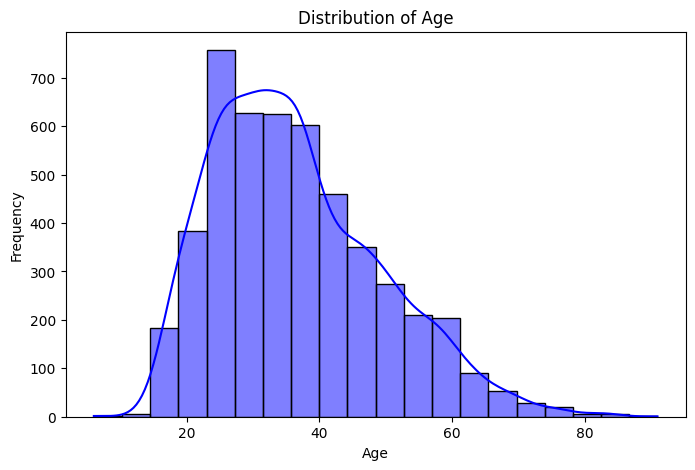

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(data['age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-10-fdc583a25018>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='race', data=data, palette='Set2', order=data['race'].value_counts().index)


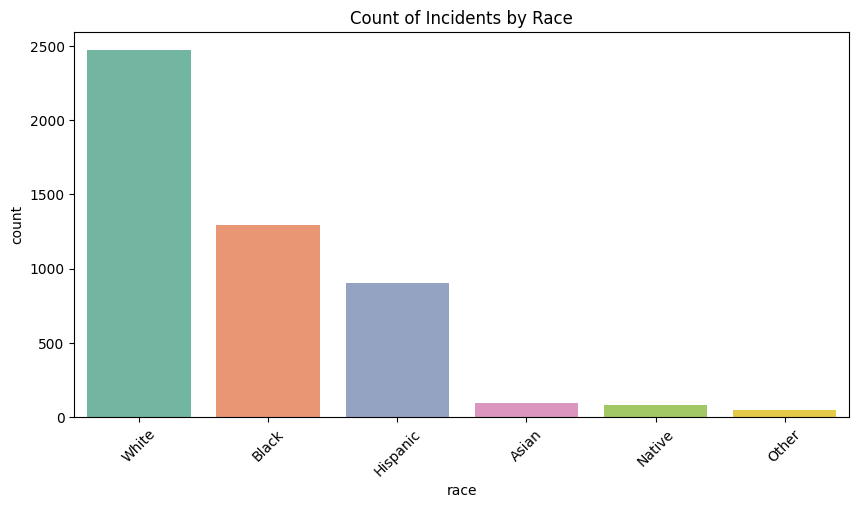

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='race', data=data, palette='Set2', order=data['race'].value_counts().index)
plt.title('Count of Incidents by Race')
plt.xticks(rotation=45)
plt.show()


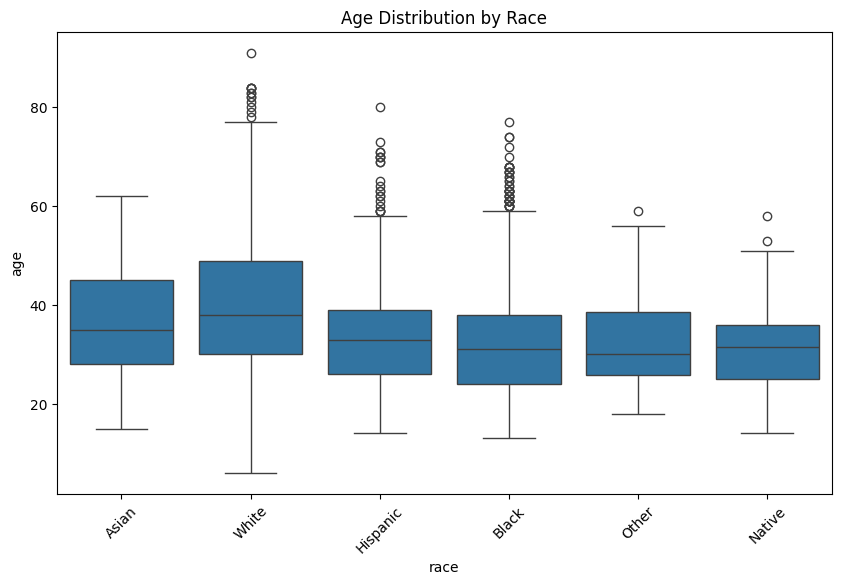

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='race', y='age', data=data)
plt.title('Age Distribution by Race')
plt.xticks(rotation=45)
plt.show()

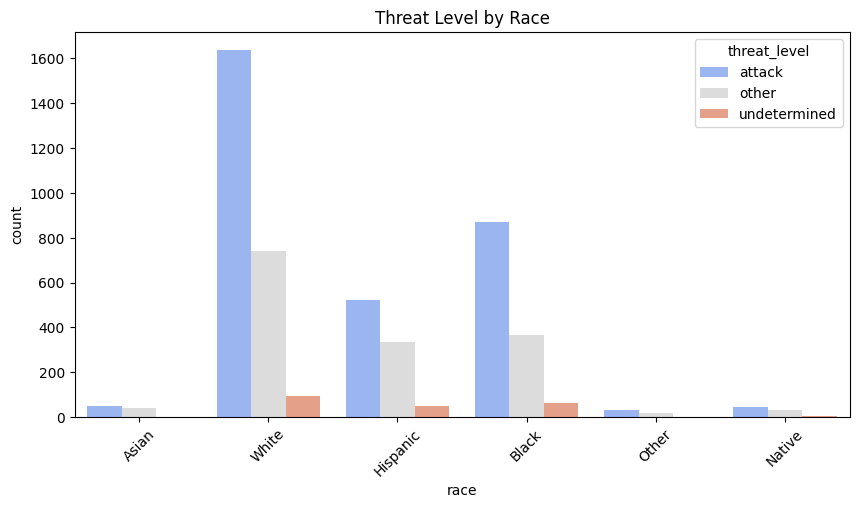

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='race', hue='threat_level', data=data, palette='coolwarm')
plt.title('Threat Level by Race')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

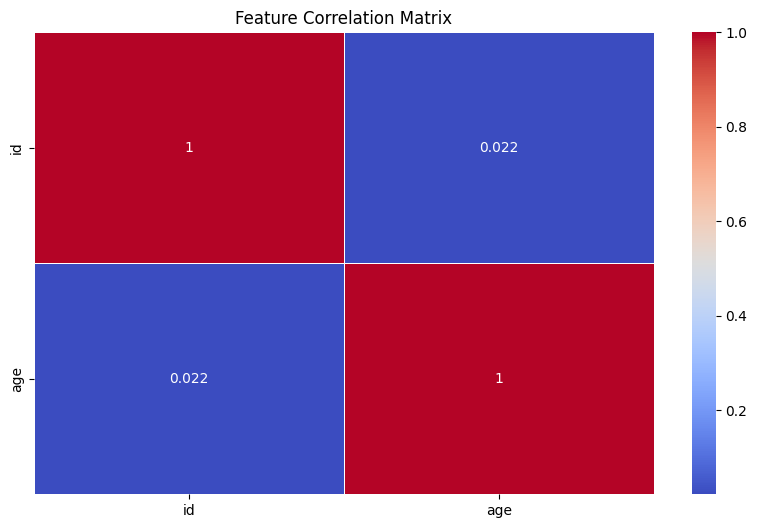

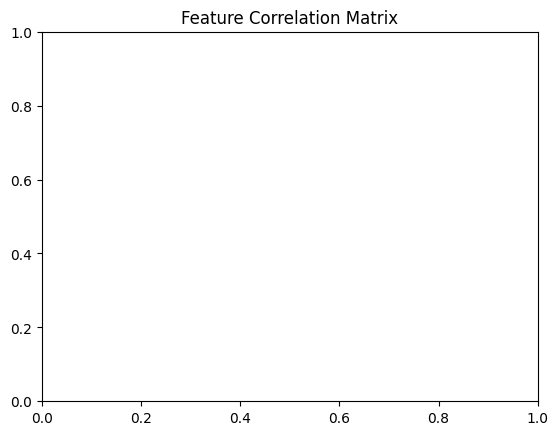

In [13]:

plt.figure(figsize=(10,6))
# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['number'])

# Compute and plot the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()
plt.title('Feature Correlation Matrix')
plt.show()